In [5]:
import numpy as np
from numpy import random
import pandas as pd
import scipy
from scipy import stats
import os
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
from pylab import legend
from pylab import plot, show, title, xlabel, ylabel
from statsmodels.stats import proportion as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
import numpy as np
from scipy.stats import f

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split

In [8]:
os.chdir('D:/Numpy-Pandas')

In [11]:
# Q1. Load the dataset and display the first five rows. Describe the purpose of each column.
df=pd.read_excel('Delivery_Food.xlsx')

In [12]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [15]:
df.info

<bound method DataFrame.info of      Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0         522         7.93   Windy           Low   Afternoon      Scooter   
1         738        16.42   Clear        Medium     Evening         Bike   
2         741         9.52   Foggy           Low       Night      Scooter   
3         661         7.44   Rainy        Medium   Afternoon      Scooter   
4         412        19.03   Clear           Low     Morning         Bike   
..        ...          ...     ...           ...         ...          ...   
995       107         8.50   Clear          High     Evening          Car   
996       271        16.28   Rainy           Low     Morning      Scooter   
997       861        15.62   Snowy          High     Evening      Scooter   
998       436        14.17   Clear           Low   Afternoon         Bike   
999       103         6.63   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experien

In [17]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [19]:
# Q2. Find the total number of records and features in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [21]:
# (a) Numerical variables
df.describe(include=['int64','float64']).columns

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

In [23]:
# (b) Categorical variables
df.describe(include='object').columns

Index(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], dtype='object')

In [25]:
# (c) Target variable
target_variable='Delivery_Time_min'
target_variable

'Delivery_Time_min'

In [27]:
# Q4. Check for missing values in all columns. Identify which column contains missing data.
df.isna().sum().sum()

120

In [29]:
df.isna().columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [31]:
#Q5. Handle the missing value in the Time_of_Day column using an appropriate method and justify your choice.
df.fillna(df.Time_of_Day.mode)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [33]:
new=df.copy()

In [35]:
new

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [76]:
# Q7. Apply One-Hot Encoding to the following categorical columns:
#  Weather
#  Traffic_Level
#  Time_of_Day
#  Vehicle_Type

In [37]:
new_dummy=pd.get_dummies(new['Weather'],drop_first=True).astype(int)
new=pd.concat([new,new_dummy],axis=1)
new.drop("Weather", axis=1, inplace=True)

In [39]:
reg_dummy1 = pd.get_dummies(new.Traffic_Level,drop_first=True).astype(int)
new = new.drop('Traffic_Level', axis=1)
new=pd.concat([new,reg_dummy1], axis=1)

In [41]:
reg_dummy2 = pd.get_dummies(new.Vehicle_Type,drop_first=True).astype(int)
new = new.drop('Vehicle_Type', axis=1)
new=pd.concat([new,reg_dummy2], axis=1)

In [43]:
reg_dummy3 = pd.get_dummies(new['Time_of_Day'],drop_first=True).astype(int)
new = new.drop('Time_of_Day', axis=1)
new=pd.concat([new,reg_dummy3], axis=1)

In [45]:
new

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Low,Medium,Car,Scooter,Evening,Morning,Night
0,522,7.93,12,1.0,43,0,0,0,1,1,0,0,1,0,0,0
1,738,16.42,20,2.0,84,0,0,0,0,0,1,0,0,1,0,0
2,741,9.52,28,1.0,59,1,0,0,0,1,0,0,1,0,0,1
3,661,7.44,5,1.0,37,0,1,0,0,0,1,0,1,0,0,0
4,412,19.03,16,5.0,68,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,13,3.0,54,0,0,0,0,0,0,1,0,1,0,0
996,271,16.28,8,9.0,71,0,1,0,0,1,0,0,1,0,1,0
997,861,15.62,26,2.0,81,0,0,1,0,0,0,0,1,1,0,0
998,436,14.17,8,0.0,55,0,0,0,0,1,0,0,0,0,0,0


In [47]:
new.isna().sum()

Order_ID                   0
Distance_km                0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
Foggy                      0
Rainy                      0
Snowy                      0
Windy                      0
Low                        0
Medium                     0
Car                        0
Scooter                    0
Evening                    0
Morning                    0
Night                      0
dtype: int64

In [49]:
new['Courier_Experience_yrs'].fillna(new['Courier_Experience_yrs'].median(),inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_5680\4056665517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new['Courier_Experience_yrs'].fillna(new['Courier_Experience_yrs'].median(),inplace=True)


In [51]:
new

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Low,Medium,Car,Scooter,Evening,Morning,Night
0,522,7.93,12,1.0,43,0,0,0,1,1,0,0,1,0,0,0
1,738,16.42,20,2.0,84,0,0,0,0,0,1,0,0,1,0,0
2,741,9.52,28,1.0,59,1,0,0,0,1,0,0,1,0,0,1
3,661,7.44,5,1.0,37,0,1,0,0,0,1,0,1,0,0,0
4,412,19.03,16,5.0,68,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,13,3.0,54,0,0,0,0,0,0,1,0,1,0,0
996,271,16.28,8,9.0,71,0,1,0,0,1,0,0,1,0,1,0
997,861,15.62,26,2.0,81,0,0,1,0,0,0,0,1,1,0,0
998,436,14.17,8,0.0,55,0,0,0,0,1,0,0,0,0,0,0


In [53]:
new.shape

(1000, 16)

 Q8. Explain why categorical features must be converted into numerical form before applying Linear Regression.
Because for linear regresssion we require only numeric data not categorical data to train and test the model

In [56]:
new = new.drop(columns=['Order_ID'])

In [58]:
new

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Low,Medium,Car,Scooter,Evening,Morning,Night
0,7.93,12,1.0,43,0,0,0,1,1,0,0,1,0,0,0
1,16.42,20,2.0,84,0,0,0,0,0,1,0,0,1,0,0
2,9.52,28,1.0,59,1,0,0,0,1,0,0,1,0,0,1
3,7.44,5,1.0,37,0,1,0,0,0,1,0,1,0,0,0
4,19.03,16,5.0,68,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.50,13,3.0,54,0,0,0,0,0,0,1,0,1,0,0
996,16.28,8,9.0,71,0,1,0,0,1,0,0,1,0,1,0
997,15.62,26,2.0,81,0,0,1,0,0,0,0,1,1,0,0
998,14.17,8,0.0,55,0,0,0,0,1,0,0,0,0,0,0


In [60]:
# Q9. After encoding, report the new total number of input features.
new.shape

(1000, 15)

In [62]:
# Q10. Define the feature matrix X and target vector y
x=new.drop('Delivery_Time_min',axis=1)
y=new['Delivery_Time_min']

In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Preparation_Time_min    1000 non-null   int64  
 2   Courier_Experience_yrs  1000 non-null   float64
 3   Foggy                   1000 non-null   int32  
 4   Rainy                   1000 non-null   int32  
 5   Snowy                   1000 non-null   int32  
 6   Windy                   1000 non-null   int32  
 7   Low                     1000 non-null   int32  
 8   Medium                  1000 non-null   int32  
 9   Car                     1000 non-null   int32  
 10  Scooter                 1000 non-null   int32  
 11  Evening                 1000 non-null   int32  
 12  Morning                 1000 non-null   int32  
 13  Night                   1000 non-null   int32  
dtypes: float64(2), int32(11), int64(1)
memory

In [66]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Delivery_Time_min
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [68]:
# Q11. Train a Linear Regression model using the dataset.
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(x,y)

LinearRegression()

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=20, test_size=0.25)
x_train = sm.add_constant(x_train,prepend=False)
mod1 = sm.OLS(y_train,x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:      Delivery_Time_min   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     199.0
Date:                Wed, 10 Dec 2025   Prob (F-statistic):          8.33e-239
Time:                        20:59:12   Log-Likelihood:                -2798.9
No. Observations:                 750   AIC:                             5628.
Df Residuals:                     735   BIC:                             5697.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Distance_km                2

In [72]:
# Q12. Write the regression equation using:
# Intercept
# Coefficients of all features
print("Intercept = ",mod.intercept_)
print("Coefficient = ",mod.coef_)

Intercept =  17.764610014027234
Coefficient =  [  2.9891487    0.9626821   -0.65348389   7.49986105   4.86990847
   9.31683126   1.97028254 -11.37635727  -5.67368232   0.49077486
  -0.97217496   0.18448567  -1.54484835  -1.41313782]


In [74]:
# Q13. Predict the delivery time for all input records using the trained model.
y_pred=mod.predict(x)
y_pred

array([ 41.9890108 ,  79.30390918,  66.26111151,  42.38785412,
        73.86239824,  65.41014995,  45.74364965,  64.1770414 ,
        37.03376784,  72.10948066,  82.19651258,  78.69078268,
        57.18806725,  37.1700522 ,  29.97660459,  35.34657701,
        68.80428356,  22.27100331,  35.4336781 ,  51.76110908,
        83.75223877,  62.09113071,  42.09759301,  55.97766909,
        62.89881358,  64.67708698,  59.50420532,  69.51135279,
        31.07625498,  70.30980614,  52.50817695,  93.58917598,
        44.23553889, 102.12965933,  44.58500806,  82.59131598,
        46.51087286,  64.25348658,  36.59297627,  44.73392854,
        45.79583584,  60.8174869 ,  26.40748259,   9.05386658,
        35.81418739,  66.2172766 ,  50.12320927,  39.47223777,
        36.92706467,  47.68758412,  52.52202672,  42.82737337,
        97.09979204,  47.21134481,  36.08535604,  46.49313349,
        48.71777859,  23.1042574 ,  58.28419211,  76.00527218,
        63.41867537,  65.88475453,  56.13217176,  43.24

In [76]:
# Q14. Add a new column called Predicted_Delivery_Time to the dataset.
df['Predicted_Delivery_Time']=y_pred

In [78]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Predicted_Delivery_Time
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,41.989011
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84,79.303909
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59,66.261112
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,42.387854
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68,73.862398
...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54,54.402050
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71,59.224580
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81,96.707021
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55,56.445947


In [80]:
# Q15. Compute the residuals (Actual − Predicted Delivery Time) for all observations.
residuals=y-y_pred
residuals

0       1.010989
1       4.696091
2      -7.261112
3      -5.387854
4      -5.862398
         ...    
995    -0.402050
996    11.775420
997   -15.707021
998    -1.445947
999     5.535224
Name: Delivery_Time_min, Length: 1000, dtype: float64

In [89]:
# Q16. Calculate the Mean Absolute Error (MAE) of the model.
from sklearn.metrics import mean_absolute_error
mean=mean_absolute_error(y,y_pred)
mean

6.466471991281705

In [91]:
# Q17. Calculate the Mean Squared Error (MSE) of the model.
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_square = mean_squared_error(y,y_pred)
mean_square

109.2368280378348

In [93]:
# Q18. Calculate the R² Score and explain its meaning in the context of this dataset.
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
r2

0.775527623139384

In [102]:
# Q19. Identify the top three features that have the strongest impact on Delivery Time based on model coefficients.
pd.DataFrame({"Feature":x.columns,"Coefficient":mod.coef_,"Abs_Coeff":np.abs(mod.coef_)}).sort_values("Abs_Coeff",ascending=False).head(3)

,Feature,Coefficient,Abs_Coeff
7,Low,-11.376357,11.376357
5,Snowy,9.316831,9.316831
3,Foggy,7.499861,7.499861


In [ ]:
# Q20. Based on your results, provide three practical business recommendations to reduce food delivery time.
#Ans:-["Reduce distance","Avoid high traffic","Use faster vehicles"]

Matplotlib

(array([113., 113.,  95., 102.,  81., 111.,  97.,  89.,  99., 100.]),
 array([ 0.59,  2.53,  4.47,  6.41,  8.35, 10.29, 12.23, 14.17, 16.11,
        18.05, 19.99]),
 <BarContainer object of 10 artists>)

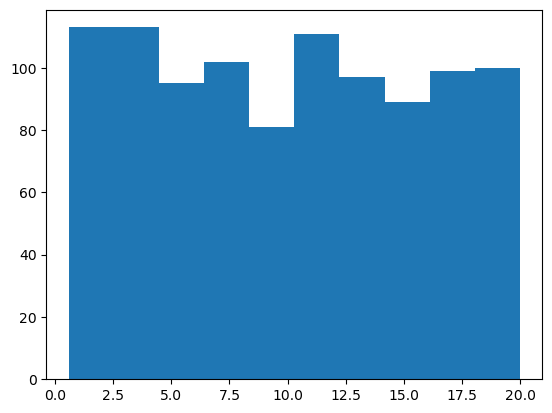

In [112]:
# Q21. Plot a histogram of Distance_km. Describe the distribution.
plt.hist(new.Distance_km)

(array([111.,  88., 131.,  82.,  78., 108.,  78., 117.,  88., 119.]),
 array([ 5. ,  7.4,  9.8, 12.2, 14.6, 17. , 19.4, 21.8, 24.2, 26.6, 29. ]),
 <BarContainer object of 10 artists>)

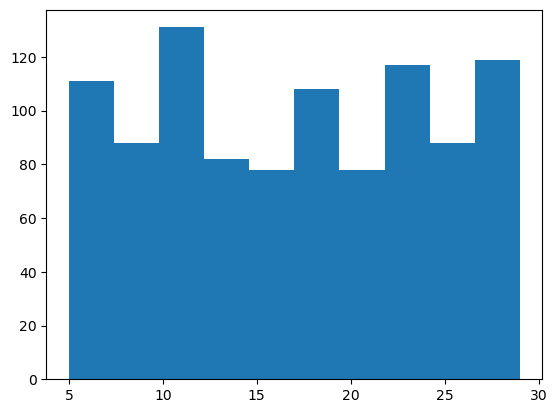

In [117]:
# Q22. Plot a histogram of Preparation_Time_min. State whether the data is uniformly distributed.
plt.hist(new.Preparation_Time_min)
# Ans : No, the point of graph are not uniformly distributed.

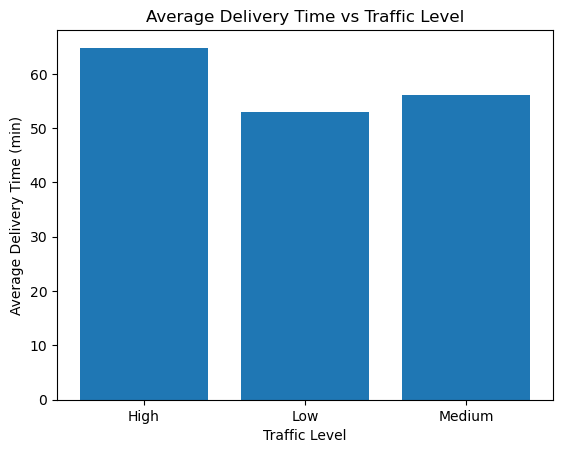

In [127]:
# Q23. Create a bar chart showing average Delivery_Time_min for each Traffic_Level.
import matplotlib.pyplot as plt
avg_time = df.groupby("Traffic_Level")["Delivery_Time_min"].mean()
plt.bar(avg_time.index, avg_time.values)
plt.xlabel("Traffic Level")
plt.ylabel("Average Delivery Time (min)")
plt.title("Average Delivery Time vs Traffic Level")
plt.show()

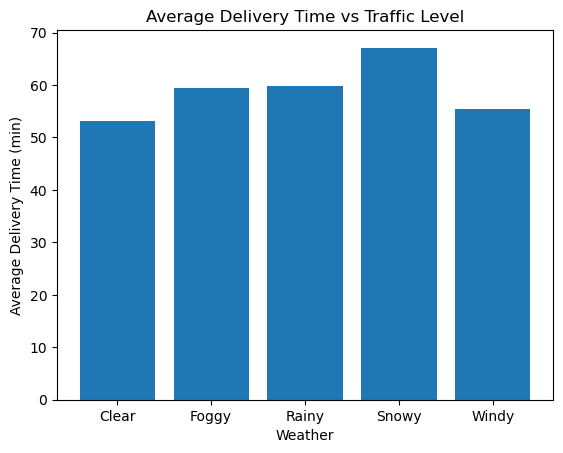

In [132]:
# Q24. Create a bar chart showing average Delivery_Time_min for each Weather condition.
import matplotlib.pyplot as plt
avg_time = df.groupby("Weather")["Delivery_Time_min"].mean()
plt.bar(avg_time.index, avg_time.values)
plt.xlabel("Weather")
plt.ylabel("Average Delivery Time (min)")
plt.title("Average Delivery Time vs Traffic Level")
plt.show()

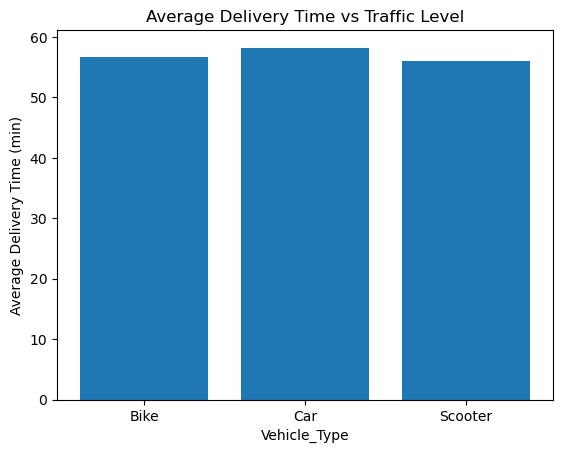

In [134]:
# Q25. Create a bar chart showing average Delivery_Time_min for each Vehicle_Type.
import matplotlib.pyplot as plt
avg_time = df.groupby("Vehicle_Type")["Delivery_Time_min"].mean()
plt.bar(avg_time.index, avg_time.values)
plt.xlabel("Vehicle_Type")
plt.ylabel("Average Delivery Time (min)")
plt.title("Average Delivery Time vs Traffic Level")
plt.show()

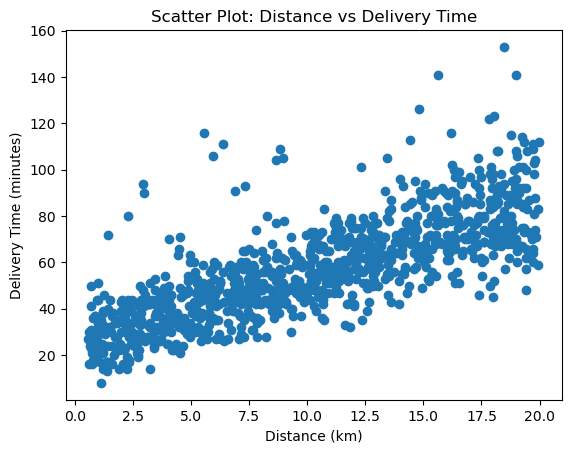

In [136]:
# Q26. Draw a scatter plot of Distance_km versus Delivery_Time_min. Comment on the trend.
import matplotlib.pyplot as plt
plt.scatter(new["Distance_km"], new["Delivery_Time_min"])
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.title("Scatter Plot: Distance vs Delivery Time")
plt.show()

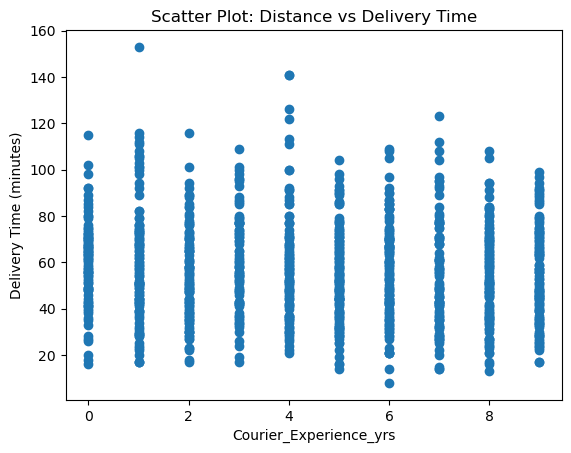

In [141]:
# Q27. Draw a scatter plot of Courier_Experience_yrs versus Delivery_Time_min. Explain the relationship.
import matplotlib.pyplot as plt
plt.scatter(new["Courier_Experience_yrs"], new["Delivery_Time_min"])
plt.xlabel("Courier_Experience_yrs")
plt.ylabel("Delivery Time (minutes)")
plt.title("Scatter Plot: Distance vs Delivery Time")
plt.show()

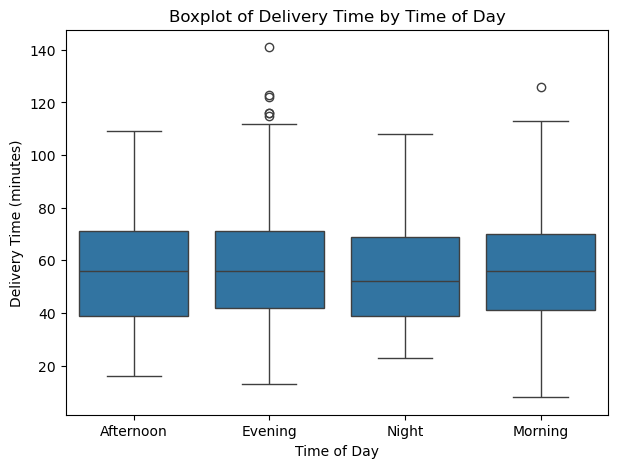

In [145]:
# Q28. Create a boxplot of Delivery_Time_min grouped by Time_of_Day.
plt.figure(figsize=(7,5))
sns.boxplot(x="Time_of_Day", y="Delivery_Time_min", data=df)
plt.xlabel("Time of Day")
plt.ylabel("Delivery Time (minutes)")
plt.title("Boxplot of Delivery Time by Time of Day")
plt.show()

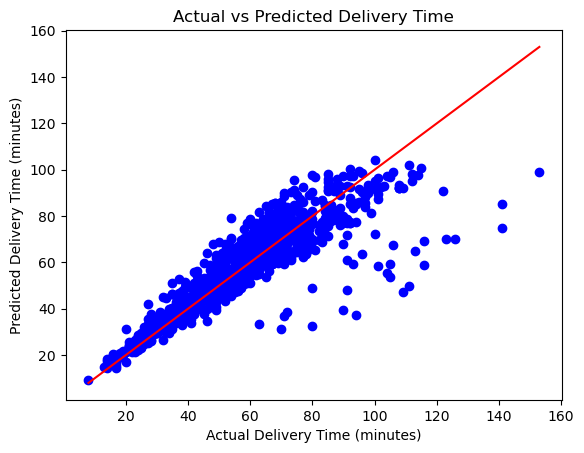

In [151]:
# Q29. Plot a scatter plot of Actual vs Predicted Delivery Time.
plt.scatter(y,y_pred, color='blue')
plt.xlabel("Actual Delivery Time (minutes)")
plt.ylabel("Predicted Delivery Time (minutes)")
plt.title("Actual vs Predicted Delivery Time")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()

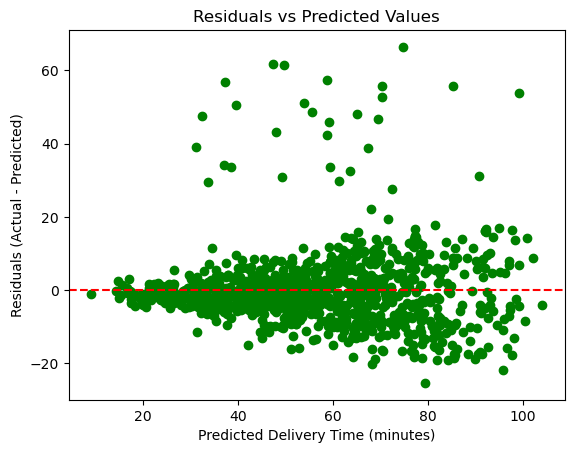

In [153]:
# Q30. Plot the residuals against the predicted values and comment on model behavior.
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at zero
plt.xlabel("Predicted Delivery Time (minutes)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.show()